In [1]:
import csv
import numpy as np
import pandas as pd
import os
from subprocess import check_output
import matplotlib.pyplot as plt 
import scipy.stats as st

csv_file = "City_of_Seattle_Wages_by_Department.csv"

sea_wage_df = pd.read_csv(csv_file)
sea_wage_df.head()

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of women's hourly rate to men's hourly rate - percentage,Notes
0,Arts and Cultural Affairs,Accountant,NaN,NaN,29.75,1.0,29.75,1,39.0,NaN,No women in title
1,Arts and Cultural Affairs,Actg Tech III,26.79,1.0,NaN,NaN,26.79,1,56.0,NaN,No men in title
2,Arts and Cultural Affairs,Admin Spec III,26.26,1.0,NaN,NaN,26.26,1,37.0,NaN,No men in title
3,Arts and Cultural Affairs,Admin Staff Asst,31.76,2.0,NaN,NaN,31.76,2,99.0,NaN,No men in title
4,Arts and Cultural Affairs,Arts Conserv Tech,27.78,1.0,27.78,1.0,27.78,2,65.0,100.0,NaN


In [2]:
number_employees_male = sea_wage_df.groupby("Department").agg({"No. Male Empl":"sum"})
number_employees_male

,No. Male Empl
Department,
Arts and Cultural Affairs,8.0
City Auditor,2.0
City Budget Office,10.0
City Employees Retirement Syst,4.0
City Light,1169.0
Civil Service Commissions,5.0
Department of Planning & Dev,177.0
Dept of Finance & Admn Svc,272.0
Ethics And Elections,4.0


In [3]:
chart_data = sea_wage_df.loc[sea_wage_df["Department"] == "City Light"]
chart_data

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of women's hourly rate to men's hourly rate - percentage,Notes
39,City Light,Accountant,30.63,4.0,30.92,3.0,30.75,7,83.29,99.05,NaN
40,City Light,"Accountant,Prin",38.48,2.0,39.96,1.0,38.97,3,16.67,96.28,NaN
41,City Light,"Accountant,Sr",35.26,4.0,33.67,2.0,34.73,6,55.83,104.73,NaN
42,City Light,Act Exec,NaN,NaN,43.10,1.0,43.10,1,38.00,NaN,No women in title
43,City Light,Actg Tech I-BU,22.56,1.0,22.56,1.0,22.56,2,59.50,100.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
298,City Light,Util Hearing Ofcr,42.25,1.0,NaN,NaN,42.25,1,80.00,NaN,No men in title
299,City Light,Util Laborer,NaN,NaN,22.56,1.0,22.56,1,244.00,NaN,No women in title
300,City Light,"Warehouser,Chief",30.88,1.0,30.88,4.0,30.88,5,185.20,100.00,NaN
301,City Light,"Warehouser,Sr-BU",26.50,4.0,26.50,9.0,26.50,13,131.08,100.00,NaN


In [8]:
avg_city_lights = chart_data.mean()
avg_city_lights

Female Avg Hrly Rate                                               38.136923
No. Female Empl                                                     3.076923
Male Avg Hrly Rate                                                 40.674619
No. Male Empl                                                       5.566667
Total Avg Hrly Rate                                                39.214015
Total No. Empl                                                      6.397727
Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION        79.104659
Ratio of women's hourly rate to men's hourly rate - percentage    100.216404
dtype: float64

The average salary of men that work in the City Lights department is Female Avg Hrly Rate                                               38.136923
No. Female Empl                                                     3.076923
Male Avg Hrly Rate                                                 40.674619
No. Male Empl                                                       5.566667
Total Avg Hrly Rate                                                39.214015
Total No. Empl                                                      6.397727
Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION        79.104659
Ratio of women's hourly rate to men's hourly rate - percentage    100.216404
dtype: float64


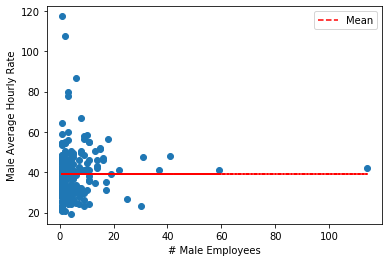

In [22]:
 y_mean = [np.mean(avg_city_lights)]*len(chart_data)

fig,ax = plt.subplots()

# Plot the data
plt.scatter(chart_data['No. Male Empl'],chart_data['Male Avg Hrly Rate'])

# Plot the average line
mean_line = ax.plot(chart_data['No. Male Empl'],y_mean, label='Mean', linestyle='--', color='red')
print(f"The average salary of men that work in the City Lights department is {mean}")
plt.xlabel('# Male Employees')
plt.ylabel('Male Average Hourly Rate')
legend = ax.legend(loc='upper right')
plt.show()